In [30]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [31]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [32]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
 import h2o

In [34]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,22 mins 12 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_iv1acj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.140 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [35]:
from h2o.automl import H2OAutoML

In [36]:
df = h2o.import_file('https://raw.githubusercontent.com/Venkata-Bhargavi/AutoML/main/predictive_maintenance%205.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
df.types

{'\ufeffUDI': 'int',
 'Product ID': 'string',
 'Type': 'enum',
 'Air temperature [K]': 'real',
 'Process temperature [K]': 'real',
 'Rotational speed [rpm]': 'int',
 'Torque [Nm]': 'real',
 'Tool wear [min]': 'int',
 'Target': 'int',
 'Failure Type': 'enum'}

In [38]:
df.describe()

Rows:10000
Cols:10

,﻿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
type,int,string,enum,real,real,int,real,int,int,enum
mins,1.0,NaN,,295.3,305.7,1168.0,3.8,0.0,0.0,
mean,5000.5,NaN,,300.00493,310.00556,1538.7761000000003,39.98690999999997,107.95100000000005,0.033900000000000007,
maxs,10000.0,NaN,,304.5,313.8,2886.0,76.6,253.0,1.0,
sigma,2886.8956799071675,NaN,,2.0002586829158036,1.4837342191657434,179.2840959134266,9.968933725121339,63.654146636636355,0.18098084265065364,
zeros,0,0,,0,0,0,0,120,9661,
missing,0,0,0,0,0,0,0,0,0,0
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure


In [39]:
# df["Failure Type"] = df["Failure Type"].asfactor()

In [40]:
train,test,valid = df.split_frame(ratios=[.7, .15])

In [41]:
y = "Type"
x = df.columns
x.remove(y)
x.remove("Product ID")
x.remove("Failure Type")
x.remove("\ufeffUDI")

In [42]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [43]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [44]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
00:13:14.341: Project: AutoML_2_20221108_01314
00:13:14.341: Cross-validation disabled by user: no fold column nor nfolds > 1.
00:13:14.342: Setting stopping tolerance adaptively based on the training frame: 0.011909826683508273
00:13:14.342: Build control seed: 10
00:13:14.343: training frame: Frame key: AutoML_2_20221108_01314_training_py_10_sid_9b3f    cols: 10    rows: 7050  chunks: 8    size: 172498  checksum: -7164350754556616251
00:13:14.343: validation frame: Frame key: py_12_sid_9b3f    cols: 10    rows: 1449  chunks: 8    size: 48725  checksum: -6373701861833338714
00:13:14.343: leaderboard frame: Frame key: py_12_sid_9b3f    cols: 10    rows: 1449  chunks: 8    size: 48725  checksum: -6373701861833338714
00:13:14.343: blending frame: NULL
00:13:14.343: response column: Type
00:13:14.344: fold column: null
00:13:14.344: weights column: null
00:13:14.345: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20221108_01314


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 105                         65280                  7            7            7             11            78            44.8

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.29206995335470676
RMSE: 0.5404349668134981
LogLoss: 0.8073808022919666
Mean Per-Class Error: 0.64334917689342
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error       Rate
---  ----  ---  ----------  -------------
3    701   6    0.995775    707 / 710
0    4199  12   0.00284968  12 / 4,211
0    1983  146  0.931423    1,983 / 2,129
3    6883  164  0.383262    2,702 / 7,050

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.616738
2    0.907234
3    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.32900324679764026
RMSE: 0.5735880462471653
LogLoss: 0.9074238145761243
Mean Per-Class Error: 0.6653594042352825
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error      Rate
---  ----  ---  ---------  -----------
0    138   2    1          140 / 140
0    871   11   0.0124717  11 / 882
0    420   7    0.983607   420 / 427
0    1429  20   0.394065   571 / 1,449

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.605935
2    0.901311
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 00:13:27  0.003 sec   0                  0.666667         1.09861             0.53773                          nan             nan                0.666667           1.09861               0.546584                           nan               nan
    2022-11-08 00:13:27  0.110 sec   5                  0.613484         0.959412            0.398865                         nan             nan                0.618602           0.973926              0.391994                           nan               nan
    2022-11-08 00:13:27  0.218 sec   10                 0.585943         0.900537            0.397872                         nan             nan                0.59575            0.928745              0.392685                           nan               nan
    2022-11-08 00:13:27  0.346 sec   15                 0.570188         0.86957             0.397021                         nan             nan                0.58416            0.910705              0.391994                           nan      

In [45]:
lb = aml.leaderboard

In [46]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GBM_2_AutoML_2_20221108_01314,0.665359,0.907424,0.573588,0.329003
DRF_1_AutoML_2_20221108_01314,0.666312,1.00901,0.5775,0.333506
GLM_1_AutoML_2_20221108_01314,0.666667,0.887911,0.565877,0.320217
XRT_1_AutoML_2_20221108_01314,0.667371,0.996904,0.577923,0.333994
GBM_1_AutoML_2_20221108_01314,0.668482,0.907648,0.573913,0.329376
GBM_3_AutoML_2_20221108_01314,0.669163,0.908604,0.57241,0.327653
GBM_4_AutoML_2_20221108_01314,0.671258,0.920374,0.576601,0.332468
XGBoost_3_AutoML_2_20221108_01314,0.671406,0.911329,0.572905,0.32822
XGBoost_1_AutoML_2_20221108_01314,0.673544,0.974561,0.585689,0.343031
XGBoost_2_AutoML_2_20221108_01314,0.677327,0.974495,0.585713,0.34306


In [47]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [48]:
aml.leader.model_performance(test)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.3300988984024924
RMSE: 0.5745423382158119
LogLoss: 0.9114792329518623
Mean Per-Class Error: 0.6698492701012784
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error      Rate
---  ----  ---  ---------  -----------
0    153   0    1          153 / 153
0    886   21   0.0231533  21 / 907
0    435   6    0.986395   435 / 441
0    1474  27   0.40573    609 / 1,501

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.59427
2    0.896069
3    1

In [49]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])


In [50]:
model_ids

['GBM_2_AutoML_2_20221108_01314',
 'DRF_1_AutoML_2_20221108_01314',
 'GLM_1_AutoML_2_20221108_01314',
 'XRT_1_AutoML_2_20221108_01314',
 'GBM_1_AutoML_2_20221108_01314',
 'GBM_3_AutoML_2_20221108_01314',
 'GBM_4_AutoML_2_20221108_01314',
 'XGBoost_3_AutoML_2_20221108_01314',
 'XGBoost_1_AutoML_2_20221108_01314',
 'XGBoost_2_AutoML_2_20221108_01314']

In [51]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20221108_01314


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.29124338082545503
RMSE: 0.5396696960414352
LogLoss: 0.811237211371299
Mean Per-Class Error: 0.6372570037221156
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error       Rate
---  ----  ---  ----------  -------------
3    692   15   0.995775    707 / 710
0    4183  28   0.00664925  28 / 4,211
0    1936  193  0.909347    1,936 / 2,129
3    6811  236  0.378865    2,671 / 7,050

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.621135
2    0.906383
3    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.32822001744874224
RMSE: 0.5729048938949136
LogLoss: 0.9113292274216007
Mean Per-Class Error: 0.6714062674250028
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error      Rate
---  ----  ---  ---------  -----------
0    137   3    1          140 / 140
0    855   27   0.0306122  27 / 882
0    420   7    0.983607   420 / 427
0    1412  37   0.405107   587 / 1,449

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.594893
2    0.901311
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 00:13:30  0.004 sec   0                  0.666667         1.09861             0.698014                         nan             nan                0.666667           1.09861               0.705314                           nan               nan
    2022-11-08 00:13:30  0.099 sec   5                  0.585319         0.904583            0.400284                         nan             nan                0.58955            0.917143              0.391304                           nan               nan
    2022-11-08 00:13:30  0.163 sec   10                 0.564044         0.866264            0.398723                         nan             nan                0.575115           0.899935              0.389924                           nan               nan
    2022-11-08 00:13:31  0.567 sec   15                 0.555755         0.851075            0.394326                         nan             nan                0.571592           0.899134              0.394065                           nan               nan
    2022-11-08 00:13:31  0.647 sec   20                 0.549287         0.836096            0.390638                         nan             nan                0.571603           0.904325              0.397516                           nan               nan
    2022-11-08 00:13:31  0.898 sec   25                 0.544131         0.822903            0.384965                         nan             nan     

In [52]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [53]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_2_20221108_01314',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_2_20221108_01314'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20221108_01314_training_py_10_sid_9b3f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20221108_01314_training_py_10_sid_9b3f'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20221108_01314_training_py_10_sid_9b3f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20221108_01314_training_py_10_sid_9b3f'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_

In [54]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'multi:softprob',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'num_class': 3,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [55]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20221108_01314


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.29124338082545503
RMSE: 0.5396696960414352
LogLoss: 0.811237211371299
Mean Per-Class Error: 0.6372570037221156
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error       Rate
---  ----  ---  ----------  -------------
3    692   15   0.995775    707 / 710
0    4183  28   0.00664925  28 / 4,211
0    1936  193  0.909347    1,936 / 2,129
3    6811  236  0.378865    2,671 / 7,050

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.621135
2    0.906383
3    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.32822001744874224
RMSE: 0.5729048938949136
LogLoss: 0.9113292274216007
Mean Per-Class Error: 0.6714062674250028
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
H    L     M    Error      Rate
---  ----  ---  ---------  -----------
0    137   3    1          140 / 140
0    855   27   0.0306122  27 / 882
0    420   7    0.983607   420 / 427
0    1412  37   0.405107   587 / 1,449

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.594893
2    0.901311
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 00:13:30  0.004 sec   0                  0.666667         1.09861             0.698014                         nan             nan                0.666667           1.09861               0.705314                           nan               nan
    2022-11-08 00:13:30  0.099 sec   5                  0.585319         0.904583            0.400284                         nan             nan                0.58955            0.917143              0.391304                           nan               nan
    2022-11-08 00:13:30  0.163 sec   10                 0.564044         0.866264            0.398723                         nan             nan                0.575115           0.899935              0.389924                           nan               nan
    2022-11-08 00:13:31  0.567 sec   15                 0.555755         0.851075            0.394326                         nan             nan                0.571592           0.899134              0.394065                           nan               nan
    2022-11-08 00:13:31  0.647 sec   20                 0.549287         0.836096            0.390638                         nan             nan                0.571603           0.904325              0.397516                           nan               nan
    2022-11-08 00:13:31  0.898 sec   25                 0.544131         0.822903            0.384965                         nan             nan     

In [56]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [57]:
# out.confusion_matrix()

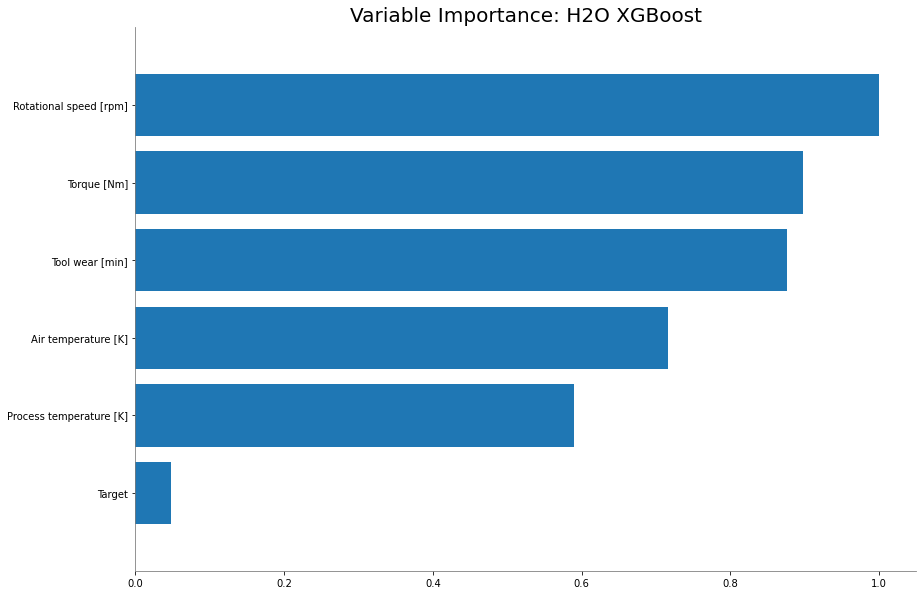

<Figure size 432x288 with 0 Axes>

In [58]:
out.varimp_plot()